In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.serialization import load_lua

ModuleNotFoundError: No module named 'torch.utils.serialization'

In [29]:
def do_canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
    canny = cv2.Canny(blur, 50, 150)
    
    return canny

def do_segment(frame):
    # Since an image is a multi-directional array containing the relative intensities of each pixel in the image, we can use frame.shape to return a tuple: [number of rows, number of columns, number of channels] of the dimensions of the frame
    # frame.shape[0] give us the number of rows of pixels the frame has. Since height begins from 0 at the top, the y-coordinate of the bottom of the frame is its height
    height = frame.shape[0]
    # Creates a triangular polygon for the mask defined by three (x, y) coordinates
    polygons = np.array([
                            [(0, height), (800, height), (380, 280)]
                        ])
    # Creates an image filled with zero intensities with the same dimensions as the frame
    mask = np.zeros_like(frame)
    # Allows the mask to be filled with values of 1 and the other areas to be filled with values of 0
    cv2.fillPoly(mask, polygons, 255)
    # A bitwise and operation between the mask and frame keeps only the triangular area of the frame
    segment = cv2.bitwise_and(frame, mask)
    return segment

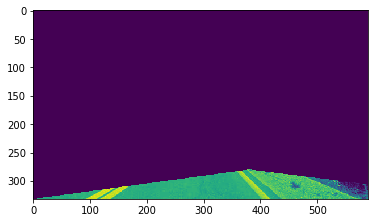

In [34]:
image = cv2.imread('../Data/Images/demo1.jpg', 0)
segment = do_segment(image)
hough = cv2.HoughLinesP(segment, 2, np.pi / 180, 100, np.array([]), minLineLength = 100, maxLineGap = 50)
plt.imshow(segment)
plt.show()